In [2]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results_1_12tr.py

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [3]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 
from  scipy.stats import norm
from scipy import stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
def reli( pred, y ):
    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram( pred,   y)

{'pred_probs': array([0.03111642, 0.07067686, 0.12175127, 0.17180304, 0.22115029,
        0.26715361, 0.31914577, 0.36650662]),
 'emp_probs': array([0.00240261, 0.00858964, 0.0212766 , 0.02966841, 0.02197802,
        0.04225352, 0.2       , 0.        ]),
 'bin_counts': array([5.827e+03, 3.609e+03, 1.316e+03, 5.730e+02, 2.730e+02, 7.100e+01,
        1.000e+01, 2.000e+00])}

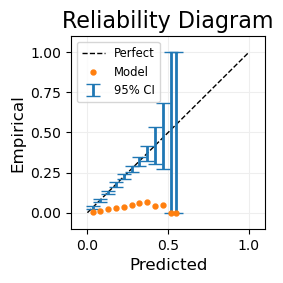

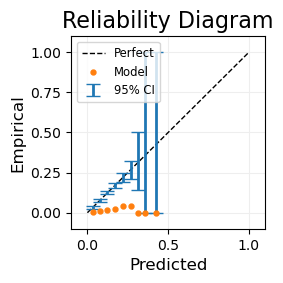

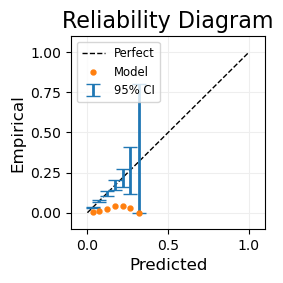

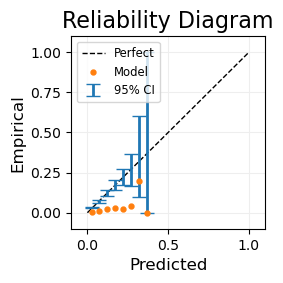

In [8]:
reli(M_test1['golds'], tp1)
reli(M_test2['golds'], tp2)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'], tp3)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test4['golds'], tp4)

In [9]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [7]:
pos = pos_1
subneg=np.random.choice(neg_1, 100*sum(gold1))
p_test = tp1
synth_size=10


In [22]:

def iso (pos, subneg, p_test, synth_size):

    #mu, sig = norm.fit (logit(pos))
    #synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))
    a, b, loc, scale = beta.fit(pos,   floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, expit(synth_pos)))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    
    #logi =  LogisticRegression( class_weight='balanced',  solver = 'liblinear', penalty = 'l1')  #(out_of_bounds = 'clip')
    #logi.fit(  logit(probs).reshape(-1,1), subgold) #, sample_weight = weights)
    #logi_prob = logi.predict_proba(   logit (probs).reshape(-1,1) ) [:,1]
    ##weights = np.where (subgold==1,  1/(1-logi_prob),1/logi_prob )     
    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(    (probs), subgold ) #, sample_weight = weights)            
    iso_test = iso.predict(     ( p_test)  )
    return iso_test

In [25]:
I1 = []
for i in range(50):
    I1.append(iso(pos_1, subneg=np.random.choice(neg_1, 50*sum(gold1)), p_test = tp1,   synth_size=10))
IM1 = np.array( [l for l in I1])


(array([1.6124e+04, 0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0.        , 0.09994768, 0.19989536, 0.29984303, 0.39979071,
        0.49973839, 0.59968607, 0.69963375, 0.79958142, 0.8995291 ,
        0.99947678]),
 <BarContainer object of 10 artists>)

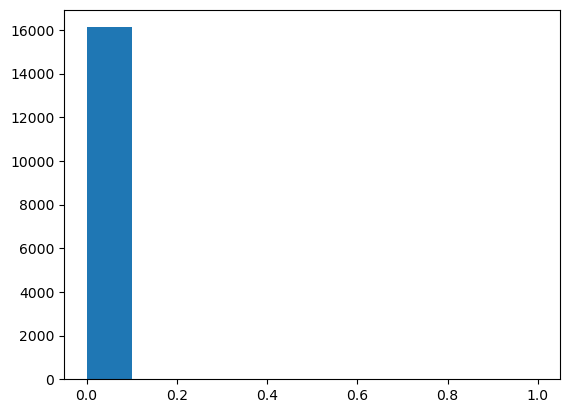

In [28]:
plt.hist( IM1.mean(0))

In [38]:
def plot_cali_curve(golds_for_eval,Probs_for_eval, CalName=''):
    prob_true, prob_pred = calibration_curve(golds_for_eval, Probs_for_eval, n_bins=20)
    plotter_b( prob_pred,prob_true, CalName, max_ = .99)
    return prob_true, prob_pred

(array([0.02963701, 0.06349206, 0.        , 0.        , 0.        ,
        0.        ]),
 array([0.01938882, 0.05700159, 0.28019541, 0.64062274, 0.93156583,
        0.99947678]))

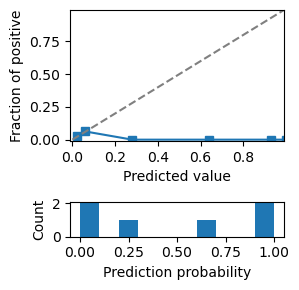

In [39]:
plot_cali_curve(  M_test1['golds'], IM1.mean(0))

In [ ]:

MaxI1 = IM1.mean(0)
reli(M_test1['golds'],   (MaxI1))

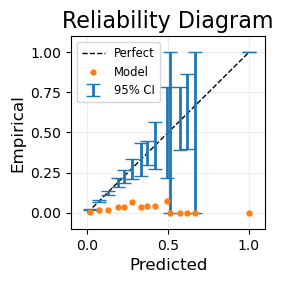

In [21]:
I2 = []
for i in range(50):
    I2.append(iso (pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),  p_test = tp2, synth_size=5 ))
IM2 = np.array( [l for l in I2])
MaxI2 =  np.quantile(IM2, .50, axis=0  )
reli(M_test2['golds'],   (MaxI2))

In [ ]:

def IPW_2step (pos, subneg, p_test, synth_size):


    wp1 = ( pc [ti==1])**1
    wp2 = ( pc [ti==2]) **1
    wp3 = ( pc [ti==3]) **1
    wp4 =  (pc [ti==4])**1
    np1 =  ((1-pc) [ti==1])**1
    np2 =  ((1-pc) [ti==2])**1
    np3 =  ((1-pc) [ti==3])**1
    np4 =  ((1-pc) [ti==4])**1
    #mu, sig = norm.fit (logit(pos))
    #synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))
    a, b, loc, scale = beta.fit(pos ) #,  floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, expit(synth_pos)))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    
    logi =  LogisticRegression( #class_weight='balanced',
                               solver = 'liblinear', penalty = 'l1')  #(out_of_bounds = 'clip')
    logi.fit(  logit(probs).reshape(-1,1), subgold) #, sample_weight = weights)
    logi_prob = logi.predict_proba(   logit (probs).reshape(-1,1) ) [:,1]

    weights = np.where (subgold==1, logi_prob , 1) 
    #weights = np.where (subgold==1,  1/(1-logi_prob),1/logi_prob ) 
    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(    (probs), subgold, sample_weight = weights)            #iso.fit_transform ( logit(probs), subgold) 
    iso_test = iso.predict(     ( p_test)  )
    return iso_test

In [9]:
def IPW_2step (pos, subneg, p_test, synth_size, 
            nknots = 30, deg=2):
  
    wp1 = ( pc [ti==1])**1
    wp2 = ( pc [ti==2]) **1
    wp3 = ( pc [ti==3]) **1
    wp4 =  (pc [ti==4])**1
    np1 =  ((1-pc) [ti==1])**1
    np2 =  ((1-pc) [ti==2])**1
    np3 =  ((1-pc) [ti==3])**1
    np4 =  ((1-pc) [ti==4])**1
  
  ----------------------------------
  
  
  #mu, sig = norm.fit (logit(pos))
  #synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))
  a, b, loc, scale = beta.fit(pos,  floc=0, fscale=1)
  synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
  many_pos = np.concatenate((pos, expit(synth_pos)))
  probs = np.concatenate((subneg, many_pos))
  subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

  logi =   IsotonicRegression(out_of_bounds = 'clip') 
  logi.fit(    (probs), subgold) 
  logi_prob  = logi.predict(   probs )
  logi_prob = np.clip(logi_prob, .001, .999)
  weights = np.where (subgold==1,  1/(1-logi_prob),1/logi_prob  ) 
  #weights = np.where (subgold==1,  1/(1-logi_prob), 1)  
 # weights = np.where (subgold==1,  logi_prob,1-logi_prob  ) 

  poly = SplineTransformer(knots='uniform', n_knots=nknots, degree=deg)
  poly_features = poly.fit_transform( logit(probs).reshape(-1,1))

  poly_reg = LogisticRegression( solver = 'liblinear', penalty = 'l1',  class_weight='balanced')  
  poly_reg.fit( poly_features, subgold, sample_weight = weights)

  p_test_poly = poly.fit_transform( logit(p_test).reshape(-1,1))
  poly_test = poly_reg.predict_proba(     (p_test_poly ))  [:,1]
  return poly_test

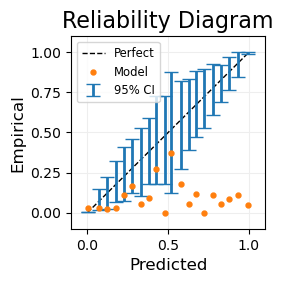

In [10]:
I1 = []
for i in range(50):
    I1.append(w_Poly(pos_1, subneg=np.random.choice(neg_1, 50*sum(gold1)), p_test = tp1,   synth_size=10))
IM1 = np.array( [l for l in I1])
MaxI1 = IM1.mean(0)
reli(M_test1['golds'],   (MaxI1))

In [12]:
SaveM1 = IM1
pd.DataFrame(IM1).to_csv('Cali_Mats/M1_Cali_Beta.csv') 


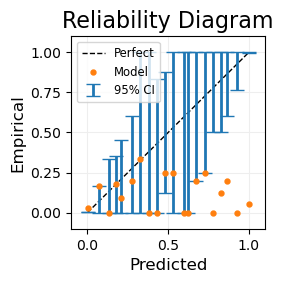

In [11]:
MaxI1 = np.median(IM1, 0)
reli(M_test1['golds'],   (MaxI1))

In [39]:
( confusion_matrix (tgold1,  MaxI1>.5) )

array([[14815,   772],
       [  424,    47]], dtype=int64)

In [103]:
def w_Polyb (pos, subneg, p_test, synth_size, 
            nknots = 30, deg=2):
  #mu, sig = norm.fit (logit(pos))
  #synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))
  a, b, loc, scale = beta.fit(pos,  floc=0, fscale=1)
  synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
  many_pos = np.concatenate((pos, expit(synth_pos)))
  probs = np.concatenate((subneg, many_pos))
  subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

  logi =   IsotonicRegression(out_of_bounds = 'clip') 
  logi.fit(    (probs), subgold) 
  logi_prob  = logi.predict(   probs )
  logi_prob = np.clip(logi_prob, .001, .999)
  weights = np.where (subgold==1,  1/(1-logi_prob),1/logi_prob  ) 
  #weights = np.where (subgold==1,  1/(1-logi_prob), 1)  
 # weights = np.where (subgold==1,  logi_prob,1-logi_prob  ) 

  poly = SplineTransformer(knots='uniform', n_knots=nknots, degree=deg)
  poly_features = poly.fit_transform( logit(probs).reshape(-1,1))
  poly_reg = LogisticRegression( solver = 'liblinear', penalty = 'l1', intercept_scaling=.5) #,  class_weight='balanced')  
  poly_reg.fit( poly_features, subgold, sample_weight = weights)

  p_test_poly = poly.fit_transform( logit(p_test).reshape(-1,1))
  poly_test = poly_reg.predict_proba(     (p_test_poly ))  [:,1]
  return poly_test

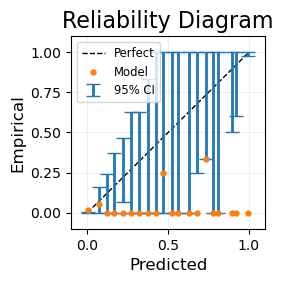

In [108]:
I2 = []
for i in range(50):
    I2.append(w_Polyb (pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),  p_test = tp2, synth_size=5,
                       deg = 5 ))
IM2 = np.array( [l for l in I2])
MaxI2 =  np.quantile(IM2, .50, axis=0  )
reli(M_test2['golds'],   (MaxI2))

In [109]:
( confusion_matrix (tgold2,    np.quantile(IM2, .5, axis=0  )  >.5) )

array([[13889,    63],
       [  218,     1]], dtype=int64)

In [96]:
pd.DataFrame(IM2).to_csv('Cali_Mats/M2_Cali_Beta4.csv') 


array([[13663,   289],
       [  207,    12]], dtype=int64)

In [47]:
def w_Poly2 (pos, subneg, p_test, synth_size, 
            nknots = 30, deg=2):
  #mu, sig = norm.fit (logit(pos))
  #synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))
  a, b, loc, scale = beta.fit(pos,  floc=0, fscale=.8)
  synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
  many_pos = np.concatenate((pos, expit(synth_pos)))
  probs = np.concatenate((subneg, many_pos))
  subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

  logi =   IsotonicRegression(out_of_bounds = 'clip') 
  logi.fit(    (probs), subgold) 
  logi_prob  = logi.predict(   probs )
  logi_prob = np.clip(logi_prob, .001, .999)
  #weights = np.where (subgold==1,  1/(1-logi_prob),1/logi_prob  ) 
  #weights = np.where (subgold==1,  1/(1-logi_prob), 1)  
  weights = np.where (subgold==1,  logi_prob,1  ) 

  poly = SplineTransformer(knots='uniform', n_knots=nknots, degree=deg)
  poly_features = poly.fit_transform( logit(probs).reshape(-1,1))

  poly_reg = LogisticRegression( solver = 'liblinear', penalty = 'l1', 
                                intercept_scaling = 2)  
  poly_reg.fit( poly_features, subgold, sample_weight = weights)

  p_test_poly = poly.fit_transform( logit(p_test).reshape(-1,1))
  poly_test = poly_reg.predict_proba(     (p_test_poly ))  [:,1]
  return poly_test

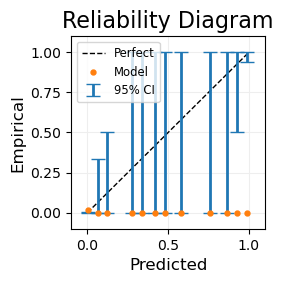

In [49]:
I2 = []
for i in range(50):
    I2.append(w_Poly2(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),  p_test = tp2, synth_size=3,
                     nknots = 30, deg=4 ))
IM2 = np.array( [l for l in I2])
MaxI2 =  np.quantile(IM2, .50, axis=0  )
reli(M_test2['golds'],   (MaxI2))

In [44]:
( confusion_matrix (tgold2,  MaxI2>.5) )

array([[13943,     9],
       [  219,     0]], dtype=int64)

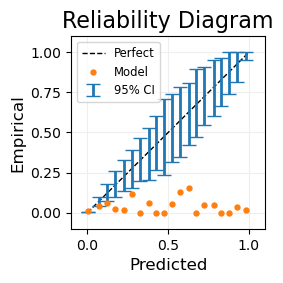

In [18]:
MaxI2 =  IM2.mean(0)
reli(M_test2['golds'],   (MaxI2))

In [490]:
pd.DataFrame(IM2).to_csv('Cali_Mats/M2_Cali_Beta.csv') 


In [34]:
def w_Poly3 (pos, subneg, p_test, synth_size, 
            nknots = 30, deg=2):
  mu, sig = norm.fit (logit(pos))
  synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))
  #a, b, loc, scale = beta.fit(pos,  floc=0, fscale=1)
  #synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
  many_pos = np.concatenate((pos, expit(synth_pos)))
  probs = np.concatenate((subneg, many_pos))
  subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

  logi =   IsotonicRegression(out_of_bounds = 'clip') 
  logi.fit(    (probs), subgold) 
  logi_prob  = logi.predict(   probs )
  logi_prob = np.clip(logi_prob, .001, .999)
  #weights = np.where (subgold==1,  1/(1-logi_prob),1/logi_prob  ) 
  weights = np.where (subgold==1,  1/(1-logi_prob), 1)  
  #weights = np.where (subgold==1,  logi_prob,1  ) 

  poly = SplineTransformer(knots='uniform', n_knots=nknots, degree=deg)
  poly_features = poly.fit_transform( logit(probs).reshape(-1,1))

  poly_reg = LogisticRegression( solver = 'liblinear', penalty = 'l1', 
                                intercept_scaling = 10)  
  poly_reg.fit( poly_features, subgold, sample_weight = weights)

  p_test_poly = poly.fit_transform( logit(p_test).reshape(-1,1))
  poly_test = poly_reg.predict_proba(     (p_test_poly ))  [:,1]
  return poly_test

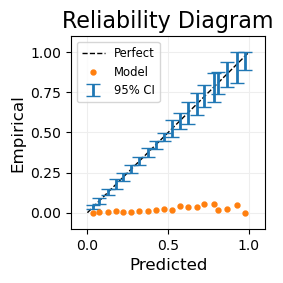

In [36]:
I3 = []
for i in range(20):
    I3.append(w_Poly3(pos_3,  np.random.choice(neg_3, 50*sum(gold3)), p_test=tp3 , synth_size =15,
                      nknots = 60, deg=20  ))
IM3 = np.array( [l for l in I3])
MaxI3 =  np.quantile( IM3, .5, axis=0)
reli(M_test3['golds'],   ( MaxI3))

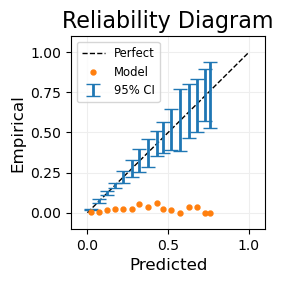

In [31]:
MaxI3 =  IM3.mean(0)
reli(M_test3['golds'],   ( MaxI3))

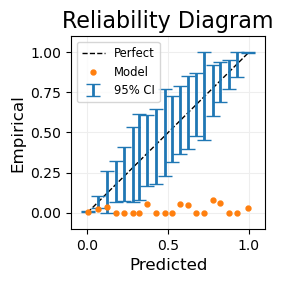

In [325]:
I4 = []
for i in range(20):
    I4.append(w_Poly(pos_4, subneg=np.random.choice(neg_4, 50*sum(gold4)),p_test = tp4, synth_size=10,
                       nknots = 10, deg=1  ))
IM4 = np.array( [l for l in I4])
MaxI4 =  np.quantile( IM4, .850, axis=0)
reli(M_test4['golds'],   ( MaxI4))

In [57]:
from scipy import stats as stats

In [58]:

Trim3 = stats.trim_mean (IM3, .05 )

In [59]:
Trim3_b = stats.tmean (IM3, (.05, .95), axis=0)

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_stats_py.py:610: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis)


{'pred_probs': array([0.02147   , 0.0598049 , 0.11614708, 0.17159956, 0.21945733,
        0.26809008, 0.32121354, 0.3682044 , 0.40125645, 0.59351885,
        1.        ]),
 'emp_probs': array([0.01178619, 0.03977733, 0.08641975, 0.05405405, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 'bin_counts': array([6.024e+03, 9.880e+03, 1.620e+02, 3.700e+01, 7.000e+00, 9.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 5.000e+00, 2.000e+00])}

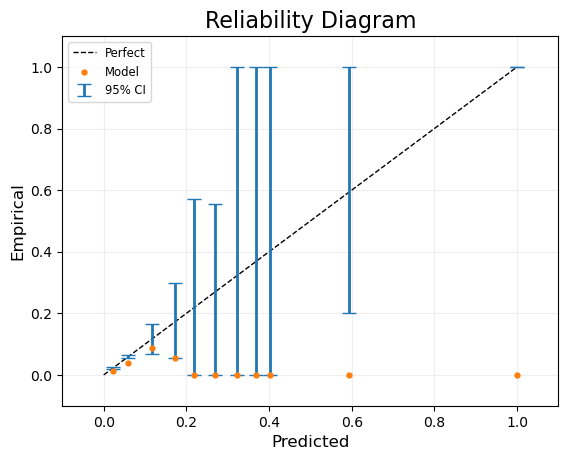

In [83]:
Q1_80 = np.quantile(IM1, .80, axis=0  )
mli.plot_reliability_diagram(M_test1['golds'],  Q1_80)

{'pred_probs': array([0.01565486, 0.0752152 , 0.11894182, 0.17967397, 0.21172599,
        0.27230198, 0.31553975, 0.35507692, 0.43428571, 0.5       ,
        0.64172653, 0.72678552, 0.77819057, 0.82121212, 1.        ]),
 'emp_probs': array([0.00497288, 0.01902562, 0.03423423, 0.04166667, 0.0952381 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'bin_counts': array([4.424e+03, 9.093e+03, 5.550e+02, 9.600e+01, 2.100e+01, 1.300e+01,
        9.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00])}

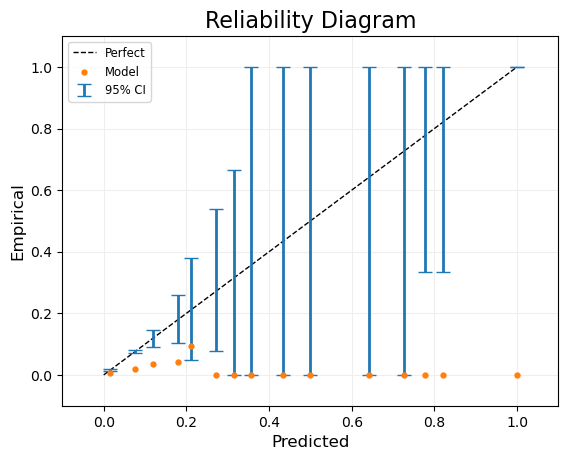

In [82]:
Q2_80 = np.quantile(IM2, .80, axis=0  )
mli.plot_reliability_diagram(M_test2['golds'],  Q2_80)

{'pred_probs': array([0.02100265, 0.06185779, 0.12069081, 0.17894379, 0.20807551,
        0.27668818, 1.        ]),
 'emp_probs': array([0.0070277 , 0.02663116, 0.03053435, 0.        , 0.        ,
        0.        , 0.5       ]),
 'bin_counts': array([9.676e+03, 3.004e+03, 1.310e+02, 1.000e+00, 1.200e+01, 3.000e+00,
        2.000e+00])}

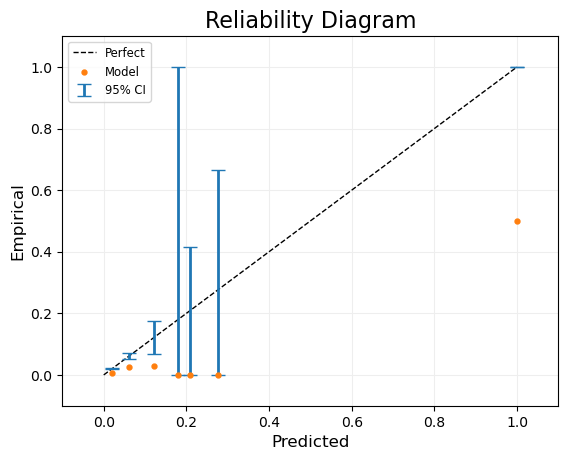

In [79]:
Q3_60 = np.quantile(IM3, .80, axis=0  )
mli.plot_reliability_diagram(M_test3['golds'],  Q3_60)


{'pred_probs': array([0.02839908, 0.07407635, 0.12311306, 0.17369751, 0.22195258,
        0.27615857, 0.3248259 , 0.41368113, 0.4636558 , 0.53229268,
        0.58463518, 0.69656978, 0.73158762, 0.83736404, 0.89844764,
        0.92533606]),
 'emp_probs': array([0.00300379, 0.01632779, 0.02764228, 0.01408451, 0.05797101,
        0.2       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ]),
 'bin_counts': array([7.657e+03, 3.246e+03, 6.150e+02, 7.100e+01, 6.900e+01, 5.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00])}

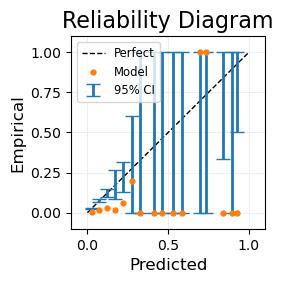

In [59]:
I4 = []
for i in range(200):
    I4.append(iso_smote(pos_4, subneg=np.random.choice(neg_4, 20*sum(gold4)),
            p_test = tp4 ,  synth_size=2, wei = w4))
IM4 = np.array( [l for l in I4])
MaxI4 = IM4.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test4['golds'],  MaxI4)

In [35]:
bins_a = np.array([0,.1,.2,.3,.4, .5, .6, .7, .8, .9, 1])


In [47]:
MedI1 = np.median(IM1, axis = 0)

{'pred_probs': array([0.02407933, 0.07295564, 0.12578728, 0.31332516, 1.        ]),
 'emp_probs': array([0.02965784, 0.04854369, 0.        , 0.        , 0.        ]),
 'bin_counts': array([1.6016e+04, 1.0300e+02, 6.0000e+00, 5.0000e+00, 2.0000e+00])}

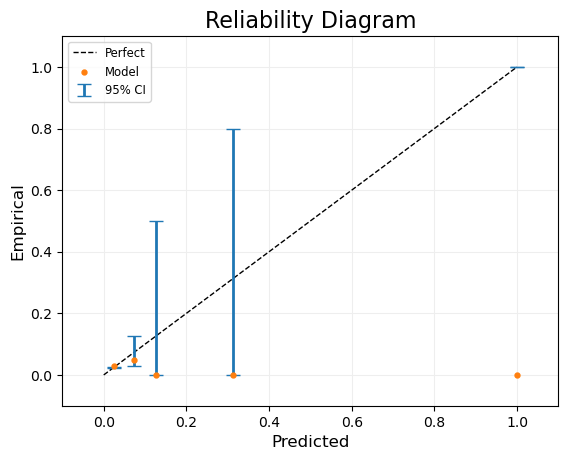

In [52]:
mli.plot_reliability_diagram(M_test1['golds'],  IM1[6])

(array([9.005e+03, 2.604e+03, 5.300e+01, 1.600e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([0.03605974, 0.13245377, 0.22884779, 0.32524182, 0.42163584,
        0.51802987, 0.6144239 , 0.71081792, 0.80721195, 0.90360597,
        1.        ]),
 <BarContainer object of 10 artists>)

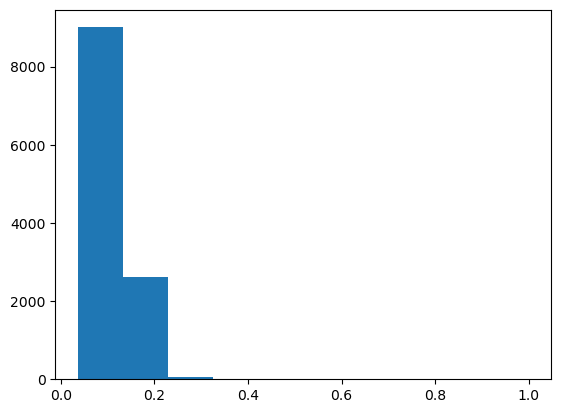

In [21]:
plt.hist(IM4[2])

In [17]:
IM1_save = IM1

In [18]:
np.shape(IM1_save)

(50, 16132)

In [ ]:
IM1_med = np.median(IM1, axis = 0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'],  IM1_med)


In [ ]:

#Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight

#model = make_pipeline(SplineTransformer(n_knots=10, degree = 10), Ridge(alpha=1e-3)) 
#model.fit(   (probs).reshape(-1,1), subgold ) #, sample_weight = weights)            
#model.fit(   (probs).reshape(-1,1), subgold , **{'SplineTransformer__sample_weight':weights}) #, sample_weight = weights)            

#model.fit(  (probs).reshape(-1,1), subgold, SplineTransformer__sample_weight = weights)            
poly_test = model.predict(      ( p_test).reshape(-1,1)  )

In [ ]:
def w_Poly (pos, subneg, p_test, synth_size):

  mu, sig = norm.fit (logit(pos))
  synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))
  #a, b, loc, scale = beta.fit(pos,  floc=0, fscale=1)
  #synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
  many_pos = np.concatenate((pos, expit(synth_pos)))
  probs = np.concatenate((subneg, many_pos))
  subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

  logi =  LogisticRegression( class_weight='balanced',solver = 'liblinear', penalty = 'l1')  #(out_of_bounds = 'clip')
  logi.fit(  logit(probs).reshape(-1,1), subgold) #, sample_weight = weights)
  logi_prob = logi.predict_proba(   logit (probs).reshape(-1,1) ) [:,1]

  #weights = np.where (subgold==1, 1/logi_prob , 1) 
  #weights = np.where (subgold==1,  1/(1-logi_prob),1 ) 
  weights = np.where (subgold==1, 1/logi_prob ,  1/(1-logi_prob))

  poly = PolynomialFeatures(degree = 3)
  poly_features = poly.fit_transform( logit(probs).reshape(-1,1))

  poly_reg = IsotonicRegression( out_of_bounds = 'clip')
  poly_reg.fit( poly_features, subgold, sample_weight = weights)

  p_test_poly = poly.fit_transform( logit(p_test).reshape(-1,1))
  poly_test = poly_reg.predict_proba(     p_test_poly )

In [ ]:
[sklearn.metrics.roc_auc_score(tgold4,  tp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  tp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  tp1 , average = 'samples')]